# solve_ODEs_CA3.py
This work was created by Phillip Pergande for Dr. Ford Versypt's Advanced Numerical Computing course. This work solves a series of differential equations designed to describe a PFR. This work takes no user inputs, but instead defines several defaults, which can be changed based on the user's needs. This work outputs 2 plots which describe the molar flow rates of each speices with respect to volume, and the Temperature with respect to volume respectively. 
# The equations described are:

$$\frac{dF_a}{dV} = r_a$$
$$\frac{dF_b}{dV} = r_b$$
$$\frac{dF_c}{dV} = r_c$$
$$\frac{dT}{dV} = \frac{U_a(T_a-T)+(-r_{1A})(-\Delta H_{Rx1A})+(-r_{2a})(-\Delta H_{Rx2A})}{F_AC_{P_A}+F_BC_{P_B}+F_CC_{P_C}}$$


This first section of the code imports the required python packages and sets up the standard inputs for the execution of the file. It also shows the function which will be called later. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
E1R = 4000; #T in K
E2R = 9000; #T in K
Ct0 = 0.1;
Ta = 373; #T in K
Cpa = 90; #J/molC
Cpb = 90; #J/molC
Cpc = 180; #J/molC
Ua = 4000; #J/m3 s C
HRXN1 = -20000; #J/molA in RXN 1
HRXN2 = -60000; #J/molA in RXN 2

def ODEs_CA3(FandT, V): #defining the function which will produce our results
    Fa = FandT[0]; #collect values from inputs
    Fb = FandT[1];
    Fc = FandT[2];
    T = FandT[3];
    T0 = 423
    Ft = Fa + Fb + Fc;
    
    Ca = Ct0*(Fa/Ft)*(T0/T); #calculating concentrations wrt T
    Cb = Ct0*(Fb/Ft)*(T0/T);
    Cc = Ct0*(Fc/Ft)*(T0/T);
    
    k1a = 10*np.exp(E1R*((1/300)-(1/T))); #determining kinetic values
    k2a = 0.09*np.exp(E2R*((1/300)-(1/T)));
    
    r1a= -k1a*Ca; #determining rate information 
    r2a = -k2a*Ca**2;
    
    ra = r1a+r2a; #combining for overall rate information
    rb = k1a*Ca;
    rc = 0.5*k2a*Ca**2;
    
    dFadV = ra; #defining the differential equations
    dFbdV = rb;
    dFcdV = rc;
    # below is the differential equation which determines T wrt V
    dTdV = (Ua*(Ta-T)+(-r1a)*(-HRXN1)+(-r2a)*(-HRXN2))/(Fa*Cpa+Fb*Cpb+Fc*Cpc)
    
    return[dFadV, dFbdV, dFcdV, dTdV]; #output the results



Below you can see the function whcih calls odeint to actually solve for the overall values of the code and places said values into an array. 

In [3]:
#set some initial conditions
Fa0 = 100;
Fb0 = 0;
Fc0 = 0;
T0 = 423;
#collect the initial conditions into a vector
init_val = [Fa0, Fb0, Fc0, T0];
#set the range over which the functions will be evaluated
volrange = np.linspace(0, 1, 101)

#call the ODE solver to generate an output matrix
output = odeint(ODEs_CA3, init_val, volrange)

Next, it is appropriate to plot the equations in such a way that they may be understood by the user. 

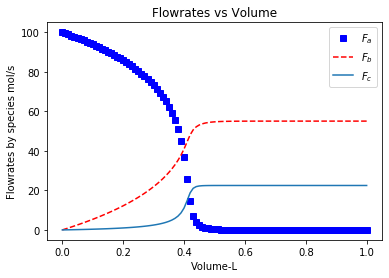

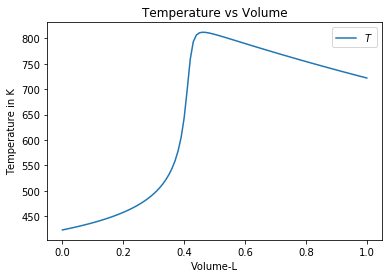

In [5]:
#plot lines with the range of volumees, outputs, and some labels
plt.figure(0)
line1 = plt.plot(volrange, output[:,0], 'bs',  label='$F_a$')
line2 = plt.plot(volrange, output[:,1], 'r--',  label='$F_b$')
line3 = plt.plot(volrange, output[:,2],   label ='$F_c$')
# line4 = plt.plot(volrange, output[:,3],  label ='$T$')
plt.xlabel("Volume-L")
plt.ylabel("Flowrates by species mol/s")
plt.title("Flowrates vs Volume")
#add a legend
plt.legend()
#create a second plot for T
plt.figure(1)
plt.plot(volrange, output[:,3], label='$T$')
plt.xlabel("Volume-L")
plt.ylabel("Temperature in K")
plt.title("Temperature vs Volume")
plt.legend()   

The above plots represent the Flowrate vs. Volume plot and the Temperature vs Volume plot respectively. 